# ENSF 519.01 Applied Data Science 
**Assignment 4** - 100 marks

**Due:** November 15, 04.00 pm.


**IMPORTANT NOTE: each task must be implemented as asked, even if there are other easier or better solutions.**

**How to deliver:**
Edit this file and write your solutions in sections specified with `# Your solution`. Test your code and when you are done, submit this notebook as an `.ipynb` file to D2L dropbox. 



## Problem 1: Clustering and Classification (45 points)

### Part A. Clustering
In this problem, we apply two clustering algorithms on MNIST handwritten digits data and compare them using ARI score. Here you can see how image data are usually represented for machine learning tasks. Complete the code below to load the MNIST data, feel free to add more code (plotting graphs or printing values) to explore the dataset. In the end, since many algorithms work better or can work only with normalized data, use `scale` method in scikit learn to normalize the pixel values.

(n_data, number of features) = (1797, 64)


array([ 0.,  5., 12., 13., 16., 16.,  2.,  0.,  0., 11., 16., 15.,  8.,
        4.,  0.,  0.,  0.,  8., 14., 11.,  1.,  0.,  0.,  0.,  0.,  8.,
       16., 16., 14.,  0.,  0.,  0.,  0.,  1.,  6.,  6., 16.,  0.,  0.,
        0.,  0.,  0.,  0.,  5., 16.,  3.,  0.,  0.,  0.,  1.,  5., 15.,
       13.,  0.,  0.,  0.,  0.,  4., 15., 16.,  2.,  0.,  0.,  0.])

5

array([ 0.        ,  5.17802955,  1.42951714,  0.27407152,  0.96867267,
        1.80378259,  0.19180703, -0.12502292, -0.05907756,  2.81857826,
        1.03648545,  0.75962245, -0.4767178 , -0.69007742, -0.51499146,
       -0.13043338, -0.04462507,  1.5099244 ,  0.72010829,  0.69077777,
       -0.98767917, -1.25998248, -0.54880546, -0.11422184, -0.03337973,
        1.7580838 ,  1.11605583,  1.22058589,  0.66221904, -1.28625035,
       -0.62889588, -0.04723238,  0.        , -0.38496671, -0.263679  ,
       -0.49018022,  0.96064411, -1.48986148, -0.82269451,  0.        ,
       -0.06134367, -0.5312841 , -1.05283456, -0.34600957,  1.33078862,
       -0.91966262, -0.79827225, -0.08874162, -0.03543326,  0.16927197,
       -0.44426532,  1.04502442,  0.67610628, -1.45261152, -0.75743581,
       -0.20978513, -0.02359646,  3.98338224,  1.85087135,  0.89424571,
       -1.98864237, -1.14664746, -0.5056698 , -0.19600752])

5

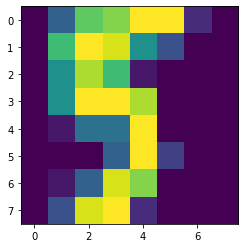

In [17]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.datasets import load_digits
from sklearn.preprocessing import scale

digits = load_digits()
data = digits['data']  # Your solution
labels = digits['target']

print('(n_data, number of features) =', data.shape)  # = (1797, 64)
# There are 64 features per sample, since each sample is a 8*8 image.

# Let's see a sample:
display(data[15], labels[15])
plt.imshow(data[15].reshape((8, 8)));  # See that nice little 5 there?

# Scale and normalize the feature values using:
# https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.scale.html

data = scale(data)
display(data[15], labels[15])

Using the pixel values as the features, apply k-means clustering to cluster the digits together. Try K-means with number of clusters = 10, use ARI score to compare KMeans clustereing results with the ground truth.

In [41]:
# Your solution
kmeans = KMeans(n_clusters=10)
kmeans.fit(data)
prediction = kmeans.labels_
ARI_score = metrics.adjusted_rand_score(prediction, labels)

print(f'K-Means ARI score = {ARI_score:.5}')

K-Means ARI score = 0.46914


Apply agglomerative clustering technique on the data. Again set cut-off number of clusters to 10. Try 4 different values of linkage (ward, complete, average, and single) and 3 distance calculation modes (affinity): euclidean, L1, and L2. Report ARI score wrt ground truth for each method. Since ward linkage can only work with euclidean distance mode, skip L1 and L2 when using ward.

In [50]:
from sklearn.cluster import AgglomerativeClustering

for linkage_mode in ('ward', 'complete', 'average', 'single'):
    for affinity in ('euclidean', 'l1', 'l2'):
        # Your solution
        if(linkage_mode=='ward' and (affinity=='l1' or affinity=='l2')):
            continue
        
        prediction = AgglomerativeClustering(n_clusters=10, linkage=linkage_mode, affinity=affinity).fit_predict(data)
        ARI_score = metrics.adjusted_rand_score(prediction, labels)
        
        print(f'AHC Affinity={affinity:9} Linkage mode={linkage_mode:8} ARI score = {ARI_score:.5}')

AHC Affinity=euclidean Linkage mode=ward     ARI score = 0.66435
AHC Affinity=euclidean Linkage mode=complete ARI score = 0.00029815
AHC Affinity=l1        Linkage mode=complete ARI score = 0.1921
AHC Affinity=l2        Linkage mode=complete ARI score = 0.00029815
AHC Affinity=euclidean Linkage mode=average  ARI score = 2.345e-05
AHC Affinity=l1        Linkage mode=average  ARI score = 0.00053779
AHC Affinity=l2        Linkage mode=average  ARI score = 2.345e-05
AHC Affinity=euclidean Linkage mode=single   ARI score = 9.454e-06
AHC Affinity=l1        Linkage mode=single   ARI score = 6.6739e-06
AHC Affinity=l2        Linkage mode=single   ARI score = 9.454e-06


### Part B. Multiclass Classification

Now we are going to use the same dataset but for a different task, which is multi-class classification. The 64 pixel values will be the features and the labels are the actual written digit. Train a Linear SVC classifier and compare it with an ensemble of LogisticRegression classifiers. SVC and Logistic Regression are binary classifiers at their cores, but their scikit-learn implementation automatically handles the one-versus-rest scheme for you. For logistic regression try both 'ovr' (one-versus-rest) and 'multinomial' for multiclass handling method. Keep the scores for all four classification methods and draw a box plot in the end to compare them.


/home/sadat/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/sadat/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/sadat/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/sadat/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/sadat/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations

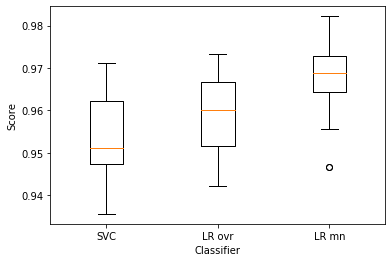

In [67]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import VotingClassifier
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression

# FIX WARNINGS #############################################################################################
scores = {name: [] for name in ('SVC', 'LR ovr', 'LR mn')}
for seed in np.arange(1, 30+1):
    X_train, X_test, y_train, y_test = train_test_split(data, labels, random_state=seed)
    
    # Your solution
    svc_score = LinearSVC().fit(X_train, y_train).score(X_test, y_test)
    scores['SVC'].append(svc_score)
    lr_ovr_score = LogisticRegression(solver='liblinear', multi_class='ovr').fit(X_train, y_train).score(X_test, y_test)
    scores['LR ovr'].append(lr_ovr_score)
    lr_mn_score = LogisticRegression(solver="lbfgs", multi_class='multinomial').fit(X_train, y_train).score(X_test, y_test)
    scores['LR mn'].append(lr_mn_score)

fig, axis = plt.subplots()
axis.boxplot([scores['SVC'], scores['LR ovr'], scores['LR mn']], labels=['SVC', 'LR ovr', 'LR mn'])
axis.set_xlabel("Classifier")
axis.set_ylabel("Score")
plt.show()


## Problem 2: Dimension reduction for feature selection (25 points)

In the first part of this problem, we compare the dimension reduction ability of PCA and linear regression models.

To use linear regression model as a dimension reduction technique, we fit the model and pick the most informative features (highest absolute coefficients) and ignore all other ones. 

Our dataset is "LLVMAll.csv", which records some performance measurements of a LLVM Compiler. See https://zenodo.org/record/322483#.Xbmov0VKjOT for more details.

- Read the dataset and apply proper normalization on each row. Note that you only apply it on the feature columns and leave the target values (performance) untouched.
- Apply Linear Regression with default paramters to pick the two most important features (use `top_k_indices`).
- Fit a PCA model (with default paramters) on the original training set to find the first two principal components.
- Now for comparison, build 3 Linear Regression models only differing on their input/output data: 
    1. use the original training and test sets
    2. use the train and test set given by linear regression selected features
    3. use the PCA transformed data
- Repeat the steps above 30 times with random_state range [1..30] for train/test splitter and calculate the test scores in the end. Note that for each run a new PCA and Linear regression should be applied (i.e., do not transform new data based on the old fitted models)
- Report the median scores over 30 runs for each of the three models

In [78]:
import numpy as np
from sklearn.decomposition import PCA 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import normalize
import pandas as pd
from IPython.display import Markdown
%matplotlib inline


def read_and_normalize(file_name):
    # Your solution
    data = pd.read_csv(file_name)
    features = normalize(data.drop(columns='$<Performance'))
    labels = data['$<Performance']
    
    return features, labels


def top_k_indices(l, k=1):
    """
    Return indices of top k elements of l.
    
    Example:
    for index in top_k_indices([5, 0, 0, 4, 10, 1], k=2):
        print(index)
        
    result: 4 0
    """
    # Your solution
    max_k_indx = np.argpartition(l, k)[-k:]
    return max_k_indx

for index in top_k_indices([5, 0, 0, 4, 10, 1], k=2):
    print(index, end=' ')

4 0 

In [83]:
features, labels = read_and_normalize('LLVMAll.csv')

scores = {name: [] for name in ('original', 'pca', 'lr')}
for seed in np.arange(1, 30+1):
    X_train, X_test, y_train, y_test = train_test_split(features, labels, random_state=seed)
    
    # Your solution
    lin_reg = LinearRegression().fit(X_train, y_train)
    top_two_features_indices = top_k_indices(lin_reg.coef_, k=2)
    
    pca = PCA(n_components=2).fit(X_train)
    
    original_score = LinearRegression().fit(X_train, y_train).score(X_test, y_test)
    scores["original"].append(original_score)
    
    X_train_lr, X_test_lr = X_train[:, top_two_features_indices], X_test[:, top_two_features_indices]
    lr_score = LinearRegression().fit(X_train_lr, y_train).score(X_test_lr, y_test)
    scores["lr"].append(lr_score)
    
    X_train_pca, X_test_pca = pca.transform(X_train), pca.transform(X_test)
    pca_score = LinearRegression().fit(X_train_pca, y_train).score(X_test_pca, y_test)
    scores["pca"].append(pca_score)
    
median_original, median_pca, median_lr = np.median(scores["original"]), np.median(scores["pca"]), np.median(scores["lr"])

display(Markdown(\
f'|[]()|Median scores|\n{"|---"*2}|\n'
f'|**Original**|{median_original:.4}|\n'
f'|**PCA**|{median_pca:.4}|\n'
f'|**LR**|{median_lr:.4}|\n'))

|[]()|Median scores|
|---|---|
|**Original**|0.7902|
|**PCA**|0.07671|
|**LR**|0.3663|


Explain your observation with respect to relative performance of PCA and linear regression for dimension reduction and why this has happened in a few sentences.

**Edit this cell to answer TODOOOOOOOOOOOOOOOOOOO**

## Problem 3: Local vs. Global Prediction (30 points)

In many situations, your training dataset is very large to include as many observations as possible, which is typically a good thing. For instance, a complex prediction model for image captioning works best if the learning dataset is massive and rich. However, if you are using a simple model (like a linear regression) for any reason (e.g., speed, interpretability, etc.) one caveat of very large datasets is that they might actually become very far off from your test set.
For instance, assume you have to predict online sales for a particular book. But your training set is the entire Amazon’s historical sales records. Obviously a simple linear model will not work well, trying to fit a line that predicts sales of everything, from books, to grocery, to toys, etc.

One simple solution could be training your model only on a portion of the training set that is more similar to the data you're interested in. For instance, in the above example, only train on the book records. 

In this part, we want to evaluate this idea automatically, by first clustering the training dataset and then fitting the model only on the closets cluster to the test data.


- Read data from the csv dataset `filename='CPU_Performance.csv'`. The columns in the dataset are:
    
    - MYCT: machine cycle time in nanoseconds (integer) 
    - MMIN: minimum main memory in kilobytes (integer) 
    - MMAX: maximum main memory in kilobytes (integer) 
    - CACH: cache memory in kilobytes (integer) 
    - CHMIN: minimum channels in units (integer) 
    - CHMAX: maximum channels in units (integer) 
    - PRP: published relative performance (integer) 
    - ERP: estimated relative performance from the original article (integer)
    
    Use the last column (ERP) as the target and the others as features.

- Take 80% of data as train and 20% as test using train_test_split with `random_state=0`
- Build a linear SVM model and report its mean squared error on the test data
- Cluster the training set to multiple clusters using Kmeans (K from 2 to 5 inclusive and `random_state=0`)
- Find the most similar cluster to the test set. To do this find the cluster that most of the the test data fall into, if they are predicted using the cluster model.
- Build a local linear svm model where you use only the closets cluster as your train dataset (all other setups unchanged)

In [93]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.svm import LinearSVR
from sklearn.cluster import KMeans
from scipy.stats import mode


# Your solution
# Split the data into traingin and testing sets as described above
data = pd.read_csv("CPU_Performance.csv")
features = data.drop(columns='ERP')
labels = data['ERP']
X_train, X_test, y_train, y_test = train_test_split(features, labels, random_state=0, test_size=0.2)

# Train a LinearSVR model on data and report its score on test set
model = LinearSVR(random_state=0).fit(X_train, y_train)
y_prediction = model.predict(X_test)
score = mean_squared_error(y_test, y_prediction)
print(f'global error={score:.5}')

for k in range(2, 5+1):
    # Make a kMeans clustrer
    kmeans = KMeans(n_clusters=k, random_state=0).fit(X_train)
    
    # Find the cluster which will contains the majority of test points
    y_prediction = kmeans.predict(X_test)
    closest_cluster_id = mode(y_prediction, axis=None)[0][0]
    
    # Create a subset of training and test sets containing only the data that fall into the cluster above
    X_train["ClusterId"] = kmeans.predict(X_train)
    Train_data = pd.concat([X_train, y_train], axis=1)
    Train_data = Train_data[Train_data["ClusterId"] == closest_cluster_id]
    
    X_test["ClusterId"] = y_prediction
    Test_data = pd.concat([X_test, y_test], axis=1)
    Test_data = Test_data[Test_data["ClusterId"] == closest_cluster_id]
    
    local_X_train, local_y_train = Train_data.drop(columns="ERP"), Train_data["ERP"]
    local_X_test, local_y_test = Test_data.drop(columns="ERP"), Test_data["ERP"]
    
    # Train a LinearSVR model on the local data and report its mean squared error on test set
    model = LinearSVR(random_state=0).fit(local_X_train, local_y_train)
    local_y_pred = model.predict(local_X_test)
    score = mean_squared_error(local_y_test, local_y_pred)
    print(f'k={k} error={score:.5}')
    

/home/sadat/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/sadat/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/sadat/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/sadat/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: 

global error=4060.1
k=2 error=107.15


/home/sadat/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/sadat/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/sadat/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/sadat/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:31: SettingWithCopyWarn

k=3 error=41.933
k=4 error=231.49
k=5 error=149.52


/home/sadat/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/sadat/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/sadat/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Did the error go down or up? Do you think it is a good practice or it's getting better (if it did) because some information is leaking from the test set?